Занятие 4. Кластеризация методом k-means (k-средних).
=============

Полезные ссылки:
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* http://scikit-learn.org/stable/modules/clustering.html

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

Пример 1. Beverage
--------

In [2]:
df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:
1. Инициализация модели, задание её параметров,
2. Подгонка модели (метод fit и/или fit_transform),
3. Предсказание для новых наблюдений (метод predict).

Для кластеризации методом k-means необходимо задать k наперёд. Попробуем k = 2. 

In [3]:
from sklearn.cluster import KMeans
# инициализация модели
model = KMeans(n_clusters=2, random_state=42)
# random_state - зерно датчика случайных чисел. 
# При каждом новом вызове с одинаковыми random_state модель будет давать
# одинаковые результаты.

In [4]:
# подгонка модели по данным из df
model.fit(df)

KMeans(n_clusters=2, random_state=42)

In [5]:
# Результат кластеризации на данных df
model.labels_

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [6]:
# координаты центров кластеров
model.cluster_centers_

array([[ 9.52380952e-01,  2.38095238e-01,  4.76190476e-02,
        -8.32667268e-17,  7.61904762e-01,  4.28571429e-01,
         4.76190476e-02,  3.80952381e-01],
       [ 1.11022302e-16,  9.23076923e-01,  5.38461538e-01,
         5.38461538e-01, -5.55111512e-17,  1.53846154e-01,
         7.69230769e-01,  7.69230769e-02]])

In [7]:
# предсказание для новых наблюдений. Метод predict.
new_items = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0]
]
model.predict(new_items)

array([1, 0])

Модель выше разбивала на два кластера. 
Как определить число кластеров?
Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод ```inertia_``` вернёт сумму расстояний от каждой точки данных до центра ближайшего у ней кластера. Таким образом, кластеризацию можно считать условно хорошей, когда инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

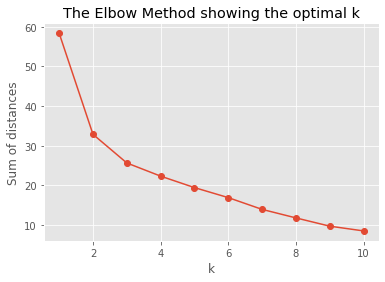

In [8]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Допустим, мы решили, что три кластера -- это оптимальный выбор. Теперь хочется посмотреть на список наблюдений, составляющий данные кластеры, и посмотреть, чем они отличаются друг от друга. Для этого применим метод ```labels_```, а затем посчитаем средние значения факторов для каждого кластера.

In [9]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
1,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333
2,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545


In [10]:
df.groupby('cluster').size()

cluster
0    11
1    12
2    11
dtype: int64

Пример 2
-------

In [11]:
os.chdir("c:/aaa/temp_py/Shad_Python_02_2/2_pretendent")

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'c:/aaa/temp_py/Shad_Python_02_2/2_pretendent'

In [ ]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
df.head()

In [ ]:
# В колонке NR находится номер объекта, его нужно исключить из данных для кластеризации
del df['NR']

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

Пример 3. Потребление протеинов в Европе
---------------------

In [12]:
os.chdir("c:/aaa/temp_py/Shad_Python_02_2/3_Protein Consumption in Europe")

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'c:/aaa/temp_py/Shad_Python_02_2/3_Protein Consumption in Europe'

In [13]:
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [14]:
# Стандартизируем данные
from sklearn import preprocessing
norm = preprocessing.StandardScaler()
norm.fit(df)
X = norm.transform(df)

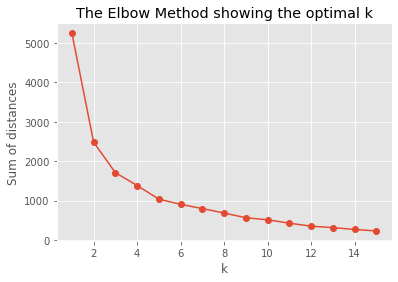

In [15]:
K = range(1, 16)
models = [KMeans(n_clusters=k).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
model = KMeans(n_clusters=6)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
0,7.725000,9.775000,2.825000,13.800000,2.175000,36.825000,4.250000,3.200000,5.375000
1,6.133333,5.766667,1.433333,9.633333,0.933333,54.066667,2.400000,4.900000,3.400000
2,13.212500,10.637500,3.987500,21.162500,3.375000,24.700000,4.650000,2.062500,4.175000
3,7.233333,6.233333,2.633333,8.200000,8.866667,26.933333,6.033333,3.800000,6.233333
4,9.866667,3.000000,1.800000,14.366667,3.033333,42.533333,3.066667,5.566667,3.700000
5,9.850000,7.050000,3.150000,26.675000,8.225000,22.675000,4.550000,1.175000,2.125000


In [17]:
df['cluster'].sort_values()

Country
Italy             0
Poland            0
Hungary           0
Czechoslovakia    0
Romania           1
Yugoslavia        1
Bulgaria          1
Belgium           2
UK                2
France            2
Switzerland       2
Ireland           2
W_Germany         2
Netherlands       2
Austria           2
Spain             3
E_Germany         3
Portugal          3
Greece            4
USSR              4
Albania           4
Denmark           5
Norway            5
Sweden            5
Finland           5
Name: cluster, dtype: int32